In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv( 
      '../data/HA/features.txt' # 컬럼 확인
    , sep='\s+' # \s: whitespace 공백을 기준으로 분리
    , header=None
    ,names=['column_index','column_name']
)

In [3]:
# 모든 row에, 컬럼 이름만 가져와라
feature_name_df.iloc[:, 1] # 즉, 컬럼명 추출

0                         tBodyAcc-mean()-X
1                         tBodyAcc-mean()-Y
2                         tBodyAcc-mean()-Z
3                          tBodyAcc-std()-X
4                          tBodyAcc-std()-Y
                       ...                 
556        angle(tBodyGyroMean,gravityMean)
557    angle(tBodyGyroJerkMean,gravityMean)
558                    angle(X,gravityMean)
559                    angle(Y,gravityMean)
560                    angle(Z,gravityMean)
Name: column_name, Length: 561, dtype: object

- x,y,z 가 한 쌍으로 움직임
- 전체는 series이고, value를 가져옴 => ndarray가 나오기 때문에 to_list 가능

In [4]:
# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()

print('전체 피처명에서 10개만 추출:', feature_name[:10]) # 10개만 추출
feature_name_df.head(20)

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


In [5]:
# 컬럼이름으로 groupby하고 누적 개수를 구함
feature_name_df.groupby('column_name').cumcount()

0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64

In [6]:
# old_feature_name_df : 중복된 컬럼명이 있는 DF
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(
          data=old_feature_name_df.groupby('column_name').cumcount()
        , columns=['dup_cnt']
    )
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(
          old_feature_name_df.reset_index()
        , feature_dup_df, how='outer'
    )
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [7]:
# 새로운 컬럼명을 만들어내라
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df[new_feature_name_df['dup_cnt'] > 0]


,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
...,...,...,...
497,498,"fBodyGyro-bandsEnergy()-17,32_2",2
498,499,"fBodyGyro-bandsEnergy()-33,48_2",2
499,500,"fBodyGyro-bandsEnergy()-49,64_2",2
500,501,"fBodyGyro-bandsEnergy()-1,24_2",2


- 84개가 중복이었다는 것
- 중복되는 컬럼에 1, 2를 매긴 것

In [8]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('../data/HA/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('../data/HA/train/X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('../data/HA/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('../data/HA/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('../data/HA/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [9]:
print('## 학습 피처 데이터 셋 info()')
print(X_train.info())

## 학습 피처 데이터 셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [10]:
# 레이블의 불균형도 확인✨ => 불균형 X => 평가지표 : 정확도
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


- 데이터가 불균형 하지 않음 (정확도만 봐도 됨)

In [11]:
# 학습, 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # 정확도

In [12]:
# 1. 알고리즘 객체 생성
dt_clf = DecisionTreeClassifier(random_state=156)
# 2. 모델 생성
dt_clf.fit(X_train, y_train)
# 3. 예측값 추출 : 파라미터 => 테스트데이터(X_test)
pred = dt_clf.predict(X_test)
# 4. 평가 => 정확도 : 파라미터 => 테스트데이터 답, 예측값
accuracy = accuracy_score(y_test, pred)

print(accuracy)

0.8547675602307431


In [13]:
# 현재 학습된 모델이 가지고 있는 파라미터와 값들을 출력
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

- 불평등 계수는 **'누구'**에 비해서 얼만큼 불평등한지 나타냄 (대상이 있어야 함) => gini

### 튜닝 : 하이퍼 파라미터를 조정해서 최적 모델을 찾음 (베스트 모델 찾기)
## GridSearchCV 클래스
- **Grid(격자) Search(찾기) CV(크로스 검증)**
- **DecisionTreeClassifier : 파라미터 => max_depth 의 값을 조정**

In [14]:
# Grid
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth' : [ 6, 8, 10, 12, 16, 20, 24]
}
# GridSearchCV 객체 생성
grid_cv = GridSearchCV(
      dt_clf # 학습할 알고리즘
    , param_grid=params # Search 할 파라미터 값
    , scoring='accuracy'# 평가지표 지정
    , cv=5 # Cross Validation 개수 => 학습 훈련
#     전체 데이터를 5개로 나눠서 훈련 => 파라미터 수까지 합쳐서 35번 학습
    , verbose=1 # 진행 상태, 결과 화면에 표시
)

# 학습 진행 => 모델 생성 => 평가(정확도) => best parameter 추출
# CV에 의해 test까지 끝냄
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_)) # 최고의 점수가 나오는 파라미터
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_) # 최적의 점수가 나오는 파라미터

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


- best가 정말 맞는지 확인해야 함

- **GridSearchCV => 파라미터 7개 => 결과 7개 추출**
- **GridSearchCV object => Attribute : cv_results_**

In [15]:
print(grid_cv.cv_results_)

{'mean_fit_time': array([1.30764604, 1.67355952, 1.9600286 , 2.2074719 , 2.46679554,
       2.50985198, 2.4998867 ]), 'std_fit_time': array([0.01334542, 0.02744534, 0.05551358, 0.10611913, 0.1808654 ,
       0.23500656, 0.22725955]), 'mean_score_time': array([0.00558476, 0.00599799, 0.00558376, 0.00598512, 0.0055923 ,
       0.00577188, 0.00517383]), 'std_score_time': array([0.00050139, 0.0006394 , 0.00049008, 0.00109142, 0.0004937 ,
       0.00073443, 0.00039   ]), 'param_max_depth': masked_array(data=[6, 8, 10, 12, 16, 20, 24],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 6}, {'max_depth': 8}, {'max_depth': 10}, {'max_depth': 12}, {'max_depth': 16}, {'max_depth': 20}, {'max_depth': 24}], 'split0_test_score': array([0.81373215, 0.82053025, 0.79945615, 0.79469748, 0.79945615,
       0.8028552 , 0.7960571 ]), 'split1_test_score': array([0.87287559, 0.81985044, 0.81441196, 0.81305235, 0.818

- 딕셔너리 형태로 출력 

In [16]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.307646,0.013345,0.005585,0.000501,6,{'max_depth': 6},0.813732,0.872876,0.819728,0.865986,0.881633,0.850791,0.028313,5
1,1.673560,0.027445,0.005998,0.000639,8,{'max_depth': 8},0.820530,0.819850,0.855102,0.868707,0.891156,0.851069,0.027719,3
2,1.960029,0.055514,0.005584,0.000490,10,{'max_depth': 10},0.799456,0.814412,0.863265,0.891156,0.887755,0.851209,0.037707,2
3,2.207472,0.106119,0.005985,0.001091,12,{'max_depth': 12},0.794697,0.813052,0.848980,0.877551,0.886395,0.844135,0.035598,7
4,2.466796,0.180865,0.005592,0.000494,16,{'max_depth': 16},0.799456,0.818491,0.853061,0.887755,0.897959,0.851344,0.038140,1
5,2.509852,0.235007,0.005772,0.000734,20,{'max_depth': 20},0.802855,0.818491,0.856463,0.877551,0.898639,0.850800,0.035718,4
6,2.499887,0.227260,0.005174,0.000390,24,{'max_depth': 24},0.796057,0.818491,0.856463,0.877551,0.898639,0.849440,0.037597,6


In [17]:
cv_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      7 non-null      float64
 1   std_fit_time       7 non-null      float64
 2   mean_score_time    7 non-null      float64
 3   std_score_time     7 non-null      float64
 4   param_max_depth    7 non-null      object 
 5   params             7 non-null      object 
 6   split0_test_score  7 non-null      float64
 7   split1_test_score  7 non-null      float64
 8   split2_test_score  7 non-null      float64
 9   split3_test_score  7 non-null      float64
 10  split4_test_score  7 non-null      float64
 11  mean_test_score    7 non-null      float64
 12  std_test_score     7 non-null      float64
 13  rank_test_score    7 non-null      int32  
dtypes: float64(11), int32(1), object(2)
memory usage: 884.0+ bytes


max_depth가 7개이기 때문에, entries가 7개가 나옴

In [18]:
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


- 파라미터 별 평균 점수가 출력됨
- 만약 24가 가장 높은 점수였다면 24 이상의 어떤 값이 베스트가 될 수 있다는 뜻 (반대의 경우도 마찬가지)
- 중간 값이 도출되었다면 사이값이 베스트 일 수 있기 때문에 처음에는 넓은 범위를 조건으로 돌린다.
- 그 후 베스트 한 놈이 어떤 놈인지 확인

### 이를 해주는 것이 GridSearchCV

In [19]:
# Cross Vaildation 안한 값이라 전반적으로 높음 (교차검증을 안했기 때문)

max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [20]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(
      dt_clf
    , param_grid=params
    , scoring='accuracy'
    , cv=5
    , verbose=1 
)

grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


### totalling 40 fits => 40개의 모델이 만들어진 형태 => best model search
### best model : best_esimator_

In [21]:
# best model : best_esimator_ 속성 => 베스트 모델 객체
best_dt_clf = grid_cv.best_estimator_ # oject로 이미 만들어진 놈 (fitting이 끝남)

pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print(accuracy)

0.8717339667458432


In [22]:
# 피처 중요도 시각화
import seaborn as sns

ftr_importances_values = best_dt_clf.feature_importances_

ftr_importances_values

array([0.        , 0.        , 0.        , 0.        , 0.00175182,
       0.        , 0.        , 0.        , 0.        , 0.00217984,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00034009, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00997154, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00122902,
       0.00629033, 0.        , 0.2533544 , 0.002077  , 0.00291231,
       0.        , 0.        , 0.02047009, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0024461 , 0.        , 0.        ,
       0.        , 0.00302454, 0.        , 0.        , 0.10188

- 0이 무수히 많음

In [23]:
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(
      ftr_importances_values # 중요도를 가진 ndarray
    , index=X_train.columns  # 컬럼명을 인덱스로 보냄
)
ftr_importances[:10]

tBodyAcc-mean()-X    0.000000
tBodyAcc-mean()-Y    0.000000
tBodyAcc-mean()-Z    0.000000
tBodyAcc-std()-X     0.000000
tBodyAcc-std()-Y     0.001752
tBodyAcc-std()-Z     0.000000
tBodyAcc-mad()-X     0.000000
tBodyAcc-mad()-Y     0.000000
tBodyAcc-mad()-Z     0.000000
tBodyAcc-max()-X     0.002180
dtype: float64

- 불필요한 컬럼을 제거하는 것이 필요함 (쓸데없는 시간을 줄이기 위해)

In [24]:
# 상위 20개
# 데이터 프레임은 여러개의 컬럼이기 때문에 by를 줘야 함
# 그러나, 시리즈는 한개의 value를 가지고 있기 때문에, 컬럼 지정할 필요 없음
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
ftr_top20

tGravityAcc-min()-X                0.253354
fBodyAccJerk-bandsEnergy()-1,16    0.212584
angle(Y,gravityMean)               0.139001
fBodyAccMag-energy()               0.115478
tGravityAcc-arCoeff()-Z,2          0.101885
fBodyGyro-maxInds-X                0.023971
tGravityAcc-energy()-Y             0.020470
tBodyGyro-correlation()-Y,Z        0.016513
tGravityAccMag-arCoeff()1          0.015741
tBodyAcc-correlation()-X,Y         0.009972
fBodyAcc-max()-Y                   0.008825
tBodyGyro-max()-X                  0.008550
tGravityAcc-max()-Y                0.006290
fBodyGyro-max()-X                  0.005247
tBodyGyro-min()-X                  0.004373
tBodyAccJerk-correlation()-X,Y     0.003967
tBodyGyroJerk-max()-X              0.003471
tGravityAcc-arCoeff()-Y,3          0.003025
angle(Z,gravityMean)               0.002987
tGravityAcc-min()-Z                0.002912
dtype: float64

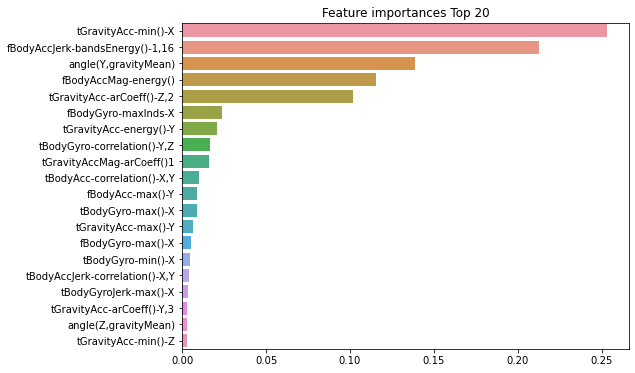

In [25]:
# 시각화 => 모델을 신규로 생성하는 것이 필요함
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#### 상위 10개에 있는 컬럼만 뽑아서 가져오면 decision tree에 넣음 비슷할 것임

In [26]:
# RandomForestClassifier 적용 : 튜닝 X
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [27]:
# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


In [28]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [29]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


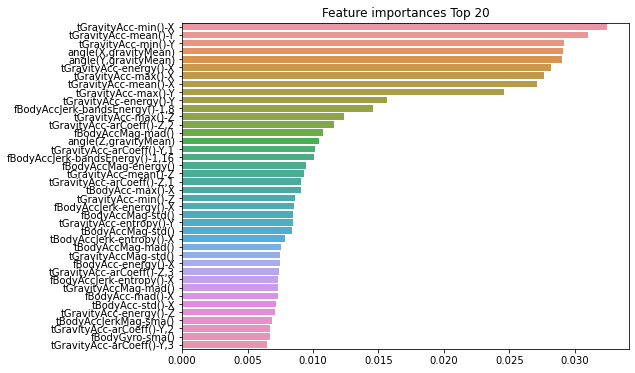

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:40]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## 4.5 GBM(Gradient Boosting Machine)
- 여기서부터 Boosting Model

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 526.2 초 


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500], # 100개나 500개 만든다는 것
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
# 모델이 8개가 만들어짐 (GridSearchCV에서는 병렬처리가 됨(GBM은 nope!))
grid_cv.fit(X_train , y_train) # 학습 데이터만 가지고 모델 생성
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
